# K-Means Clustering

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

Advantages of k-means:

- Relatively simple to implement.

- Scales to large data sets.

- Guarantees convergence.

- Can warm-start the positions of centroids.

- Easily adapts to new examples.

- Generalizes to clusters of different shapes and sizes, such as elliptical clusters.

Disadvantage of Kmeans : 

- Choosing K Manually
- Being Dependent on initial values
- Clustering Outliers
- Scaling with number of diensions


## Importing Libraries

In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

## Read Data  

In [5]:
data=pd.read_csv('C:/Users/nehal/Music/9.Machine Learning 3/Faculty Notebook/customer.csv')
data.head()

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1


### Checking Data Types

In [6]:
data.dtypes

Cust_Number         object
Yearly_Income        int64
Age                  int64
Cust_Spend_Score     int64
Sex                  int64
dtype: object

### Removing Insignificant Variables

In [8]:
data.drop('Cust_Number',axis=1,inplace=True)

In [9]:
data.head()

,Yearly_Income,Age,Cust_Spend_Score,Sex
0,15000,18,44,0
1,15000,18,79,0
2,16000,23,8,1
3,16000,25,79,1
4,17000,32,41,1


### Outlier analysis and treatment

<AxesSubplot:>

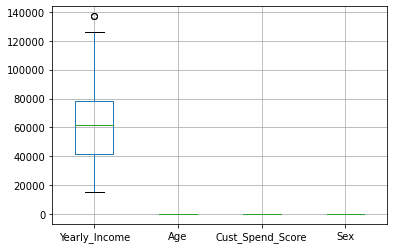

In [11]:
data.boxplot()

<AxesSubplot:>

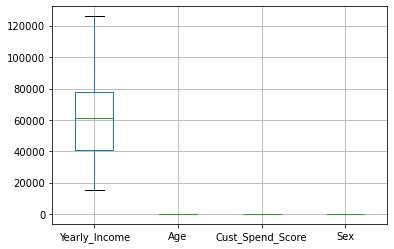

In [13]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1

df=data[~((data<(q1-(1.5*IQR))) | (data>(q3+(1.5*IQR)))).any(axis=1)]
df.boxplot()

In [14]:
# Missing Value Treatment
data.isnull().sum()

Yearly_Income       0
Age                 0
Cust_Spend_Score    0
Sex                 0
dtype: int64

In [16]:
# Scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [18]:
df_scaled=pd.DataFrame(scale.fit_transform(df),columns=df.columns)
df_scaled.head()

,Yearly_Income,Age,Cust_Spend_Score,Sex
0,-1.779171,-1.503384,-0.283684,-1.141195
1,-1.779171,-1.503384,1.068399,-1.141195
2,-1.739447,-1.148593,-1.674398,0.876275
3,-1.739447,-1.006676,1.068399,0.876275
4,-1.699723,-0.509968,-0.399577,0.876275


In [22]:
# Clutering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Elbow Plot

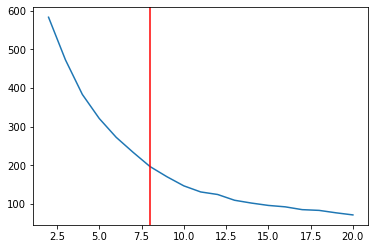

In [28]:

wcss=[]
for i in range(2,21):
    model=KMeans(i,random_state=5)
    model.fit(df_scaled)
    
    wcss.append(model.inertia_)
    
plt.plot(range(2,21),wcss)
plt.axvline(8,color='red')

## Silhouette Score
The Silhouette score can also be used to identify the optimal number of clusters. We plot the Silhouette score for different values of K. The K with the highest Silhouette score represents the optimal value for the number of clusters (K).

In [42]:
n_clusters=range(2,18)
score=[]
for k in n_clusters:
    cluster=KMeans(n_clusters=k,random_state=10)
    predict=cluster.fit_predict(df_scaled)
    score.append(silhouette_score(df_scaled,predict,random_state=10))
for x in range(0,16):
    print(x+2,"-",score[x])

2 - 0.24909882529732422
3 - 0.2567882435850623
4 - 0.2901446710089679
5 - 0.31472981457171617
6 - 0.3328119997703432
7 - 0.3602421296487236
8 - 0.39020650213938873
9 - 0.3994076582213406
10 - 0.42251401737432315
11 - 0.43166429980090903
12 - 0.4201400980017394
13 - 0.43057612260449507
14 - 0.42098657207985957
15 - 0.41633746896854956
16 - 0.41403135288707515
17 - 0.4097373097655924


1    42
4    38
0    37
5    29
3    29
2    23
Name: label, dtype: int64


<BarContainer object of 6 artists>

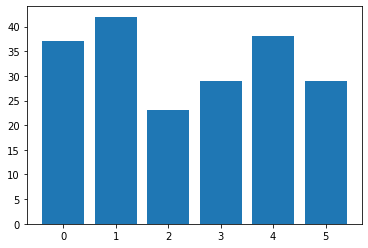

In [55]:
model=KMeans(n_clusters=6,random_state=10).fit(df_scaled)
class_labels=model.predict(df_scaled)
df_scaled['label']=class_labels

print(df_scaled['label'].value_counts())

plt.bar(df_scaled['label'].value_counts().index,df_scaled['label'].value_counts())